In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import math
from sklearn import metrics

Ładowanie i zapoznawanie się z danymi

In [67]:
data = pd.read_csv("train.csv", low_memory=False)
y = pd.Series(data2['Credit_Score'])
X = data.drop(['Credit_Score'],axis=1)
# Train - budowa, test - zbior testowy dla budowy, val - zbiór dla validacji
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123
)
X_train, X_test, y_train, y_test = train_test_split(
     X_train, y_train, test_size=0.2, random_state=123
)

In [68]:
data.Credit_Score.unique() 

array(['Good', 'Standard', 'Poor'], dtype=object)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
data.shape

(20000, 29)

Podział zbioru

In [ ]:
# y = pd.Series(data['Credit_Score'])
# X = data.drop(['Credit_Score'],axis=1)
# # Train - budowa, test - zbior testowy dla budowy, val - zbiór dla validacji
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=123
# )
# X_train, X_test, y_train, y_test = train_test_split(
#      X_train, y_train, test_size=0.2, random_state=123
# )

Usuwanie kolumn i czyszczenie zbioru

In [70]:
def create_df(X,y):
  return X.join(y)

def drop_columns(df):
  drop_cols = ['ID','Name','SSN']
  df_dropped = df.drop(drop_cols , axis=1)
  return df_dropped

<span style="color: red"> Usuwanie zbyt dużej ilości kolumn zostało poprawione</span> 

In [71]:
Train_dropped = drop_columns(data)

In [72]:
for i in Train_dropped:
  print('\n',i,Train_dropped[i].unique())


 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

 Month ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]

 Num_Bank_Accounts [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026


 Credit_Utilization_Ratio [26.82261962 31.94496006 28.60935202 ... 41.25552226 33.63820798
 34.19246265]

 Credit_History_Age ['22 Years and 1 Months' nan '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years and 5 Months' '22 Years and 6 Months'
 '22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 9 Months' '26 Years and 10 Months' '26 Years and 11 Months'
 '27 Years and 0 Months' '27 Years and 1 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '17 Years and 11 Months'
 '18 Years and 1 Months' '18 Years and 2 Months' '18 Years and 3 Months'
 '18 Years and 4 Months' '17 Years and 3 Months' '17 Years and 4 Months'
 '17 Years and 5 Months' '17 Years and 6 Months' '17 Years and 7 Months'
 '17 Years and 8 Months' '30 Years and 8 Months' '30 Years and 9 Months'
 '30 Years and 10 Months' '30 Years and 11 Months' '31 Years and 0 Months'
 '31 Years and 1 Months' '31 Years and 2 Months' '31 Years and 3 Months'
 '32 Years 

In [73]:
def clean_records(df):
  clean = df.copy()
  pattern = "\\`*_{}[]()>#@+!$:;%"
  num_columns = ['Age', 'Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
           'Interest_Rate', 'Num_of_Loan', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Num_Credit_Inquiries']
  str_columns = ['Month','Occupation','Credit_History_Age','Payment_of_Min_Amount', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']
  for i in num_columns:
    for c in pattern:
      clean[i] = clean[i].astype(str).str.replace(c,'')

  for i in str_columns:
    for c in pattern:
      clean[i] = clean[i].replace(c,'')
  return clean


In [74]:
Train_clean_records = clean_records(Train_dropped)
Train_clean_records.head()

C:\Users\karim\AppData\Local\Temp/ipykernel_28488/1508392769.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,...,,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,nan,3,4,3,4,...,Good,809.98,31.94496005538421,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,nan,3,4,3,4,...,Good,809.98,28.60935202206993,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,nan,3,4,3,4,...,Good,809.98,31.377861869582357,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,...,Good,809.98,24.797346908844982,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [75]:
def Credit_History_Age_trasform(df):
  CHA_transform = df.copy()
  CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
  CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(str).str.replace('Months','')

  for i in CHA_transform.Credit_History_Age.index:
    if CHA_transform.Credit_History_Age[i][-3] == ".":
       CHA_transform.Credit_History_Age[i] = str(CHA_transform.Credit_History_Age[i]).replace(".", ".0")

  CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(float)
  CHA_transform['Credit_History_Age'] = (CHA_transform['Credit_History_Age'] % 1 * 100 + CHA_transform['Credit_History_Age'] // 1) * 12
  return CHA_transform

In [76]:
Train_CHA_transformed = Credit_History_Age_trasform(Train_clean_records)
Train_CHA_transformed.Credit_History_Age

0        276.0
1          NaN
2        300.0
3        312.0
4        324.0
         ...  
99995    444.0
99996    456.0
99997    468.0
99998    480.0
99999    492.0
Name: Credit_History_Age, Length: 100000, dtype: float64

<AxesSubplot:>

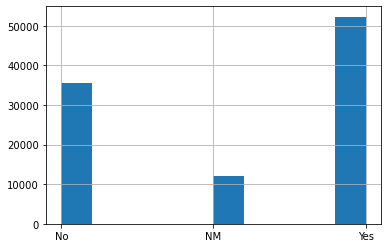

In [77]:
Train_CHA_transformed.Payment_of_Min_Amount.hist()

Kodowanie kolumn

In [78]:
def colums_encoding(df):

    df["Payment_Behaviour"] = df["Payment_Behaviour"].replace('!@9#%8', 'Unknown_spent_Unknown_value_payments')
    split_payment = lambda x:  ([x.split("_")[0], x.split("_")[2]] if (x is not None) else ["Unknown", "Unknown"])
    df["Payment_Behaviour"] = df["Payment_Behaviour"].apply(split_payment)
    df[["Spending_Behaviour", "Value_Payments"]] = pd.DataFrame(df["Payment_Behaviour"].tolist(), index=df.index)
    spending_dict = {'Low':0, 'High':1, 'Unknown':float('nan')}
    value_dict = {'Small':0, 'Medium':1, 'Large':2,  'Unknown':float('nan')}
    df['Spending_Behaviour'] = df['Spending_Behaviour'].map(spending_dict)
    df['Value_Payments'] = df['Value_Payments'].map(value_dict)
    del df["Payment_Behaviour"]

    dict_target={'Poor': "0", 
          "Standard":"1", 
          "Good":"2"}
    df.Credit_Score = df.Credit_Score.map(dict_target).astype(float)

    df = pd.get_dummies(df, prefix='Minimal', columns=['Payment_of_Min_Amount'], drop_first=False)
    return df

<span style='color: red'> Uwagi zespołu walidacyjnego dotyczące funkcji columns_encoding zostały wysłuchane</span>

In [79]:
Train_encoded = colums_encoding(Train_CHA_transformed)
Train_encoded.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Behaviour,Value_Payments,Minimal_NM,Minimal_No,Minimal_Yes
0,CUS_0xd40,January,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,...,276.0,49.57494921489417,80.41529543900253,312.49408867943663,2.0,1.0,0.0,0,1,0
1,CUS_0xd40,February,23,Scientist,19114.12,nan,3,4,3,4,...,NaN,49.57494921489417,118.28022162236736,284.62916249607184,2.0,0.0,2.0,0,1,0
2,CUS_0xd40,March,-500,Scientist,19114.12,nan,3,4,3,4,...,300.0,49.57494921489417,81.699521264648,331.2098628537912,2.0,0.0,1.0,0,1,0
3,CUS_0xd40,April,23,Scientist,19114.12,nan,3,4,3,4,...,312.0,49.57494921489417,199.4580743910713,223.45130972736786,2.0,0.0,0.0,0,1,0
4,CUS_0xd40,May,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,...,324.0,49.57494921489417,41.420153086217326,341.48923103222177,2.0,1.0,1.0,0,1,0


In [80]:
Train_encoded.dtypes

Customer_ID                  object
Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary        object
Num_Bank_Accounts            object
Num_Credit_Card              object
Interest_Rate                object
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date          object
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries         object
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio     object
Credit_History_Age          float64
Total_EMI_per_month          object
Amount_invested_monthly      object
Monthly_Balance              object
Credit_Score                float64
Spending_Behaviour          float64
Value_Payments              float64
Minimal_NM                    uint8
Minimal_No                    uint8
Minimal_Yes                 

In [81]:
def encoding_to_num(df):
  df_encoding_int = df.copy()
  columns = ['Age', 'Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
             'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
             'Interest_Rate', 'Num_of_Loan', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', "Changed_Credit_Limit", "Num_Credit_Inquiries"]
  df_encoding_int.Changed_Credit_Limit = [str(i or np.NaN) for i in df_encoding_int.Changed_Credit_Limit]
  for i in columns:
    df_encoding_int[i] = df_encoding_int[i].astype(float)

  
  return df_encoding_int

In [82]:
Train_encoded_int = encoding_to_num(Train_encoded)
Train_encoded_int['Type_of_Loan'] = Train_encoded_int['Type_of_Loan'].astype(str).str.replace('and ','')
Train_encoded_int['Type_of_Loan'] = Train_encoded_int['Type_of_Loan'].astype(str).str.replace(' Loan','')
Train_encoded_int['Type_of_Loan'] = Train_encoded_int['Type_of_Loan'].astype(str).str.replace('nan','nany')
Train_encoded_int.dtypes

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                float64
Spending_Behaviour          float64
Value_Payments              float64
Minimal_NM                    uint8
Minimal_No                    uint8
Minimal_Yes                 

In [83]:
def encoding_columns_2(df):
  df_drop = df.copy()
  dict_target={'Bad': 0, 
          "Standard":1, 
          "Good":2,
          "":float('nan')}
  df_drop.Credit_Mix = df_drop.Credit_Mix.map(dict_target).astype(float)


  dict_target={'January': 1, 
          "February":2, 
          "March":3,
          "April":4,
          "May":5,
          "June":6,
          "July":7,
          "August":8,
          "September":9,
          "October":10,
          "November":11,
          "December":12}


  df_drop.Month = df_drop.Month.map(dict_target).astype(float)
  sin_values = [math.sin((2*math.pi*x)/12) for x in list(df_drop.Month)]
  cos_values = [math.cos((2*math.pi*x)/12) for x in list(df_drop.Month)]
  df_drop = df_drop.assign(Month_sin = sin_values, Month_cos = cos_values)
  df_drop = df_drop.drop("Month", axis = 1)


  
  text = ""
  for i in Train_encoded_int.Type_of_Loan:
    text = text + i + ","
  
  texting = list(text.split(","))
  for i in range(len(texting)):
    texting[i] = texting[i].strip()
  texting = list(set(texting))
  try:
    texting.remove('')
  except ValueError:
    pass
  
  try:
    texting.remove('nany')
  except ValueError:
    pass
  
  for i in texting:
    x = []
    for j in df_drop.Type_of_Loan:
      x.append(str(j).count(i))
    df_drop[i] = x
  
  df_drop = df_drop.drop("Type_of_Loan", axis = 1)


  return df_drop

In [24]:
Train_dropped = dropping2(Train_encoded_int)

NameError: name 'dropping2' is not defined

<span style='color: red'>powinno być encoding_columns_2 a nie dropping 2</span>

In [84]:
Train_dropped = encoding_columns_2(Train_encoded_int)

In [85]:
Train_dropped.Occupation.value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [86]:
def occupation_agg(df):
  df_agg = df.copy()
  df_agg['Occupation'] = df_agg['Occupation'].astype(str).str.replace('_______','Other')
  df_agg = pd.get_dummies(df_agg, prefix='Occupation', columns=['Occupation'], drop_first=False)
  df_agg = df_agg.drop_duplicates()
  return df_agg

In [87]:
Train_occ_agg = occupation_agg(Train_dropped)
Train_occ_agg.dtypes

Customer_ID                  object
Age                         float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                float64
Spending_Behaviour          float64
Value_Payments              float64
Minimal_NM                    uint8
Minimal_No                    uint8
Minimal_Yes                   uint8
Month_sin                   float64
Month_cos                   float64
Personal                    

In [88]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

Zamiana nulli

In [89]:
Train_swaped = swap_columns(Train_occ_agg, 'Credit_Score', 'Occupation_Writer')
Train_swaped.isnull().sum()

Customer_ID                     0
Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Total_EMI_per_month             0
Amount_invested_monthly      4479
Monthly_Balance              1200
Occupation_Writer               0
Spending_Behaviour           7600
Value_Payments               7600
Minimal_NM                      0
Minimal_No                      0
Minimal_Yes                     0
Month_sin                       0
Month_cos                       0
Personal                        0
Payday                          0
Not Specified 

<span style='color: red'>W jakim celu zamieniana jest kolumna credit_score i occupation_writer?</span>

In [90]:
def fill_missing_values(df):
  df_na = df.copy()

  
  cols = list(df_na.columns.values)
  cols.remove('Customer_ID')
  cols.remove('Credit_Score')
  for i in cols:
    df_na[i] = df_na[i].fillna(df_na.groupby('Customer_ID')[i].transform("median"))
    df_na[i].fillna(Train_swaped[i].median(), inplace = True)
  df_na = df_na.drop("Customer_ID", axis = 1)

  
  return df_na

Korelacje i outliery

<AxesSubplot:>

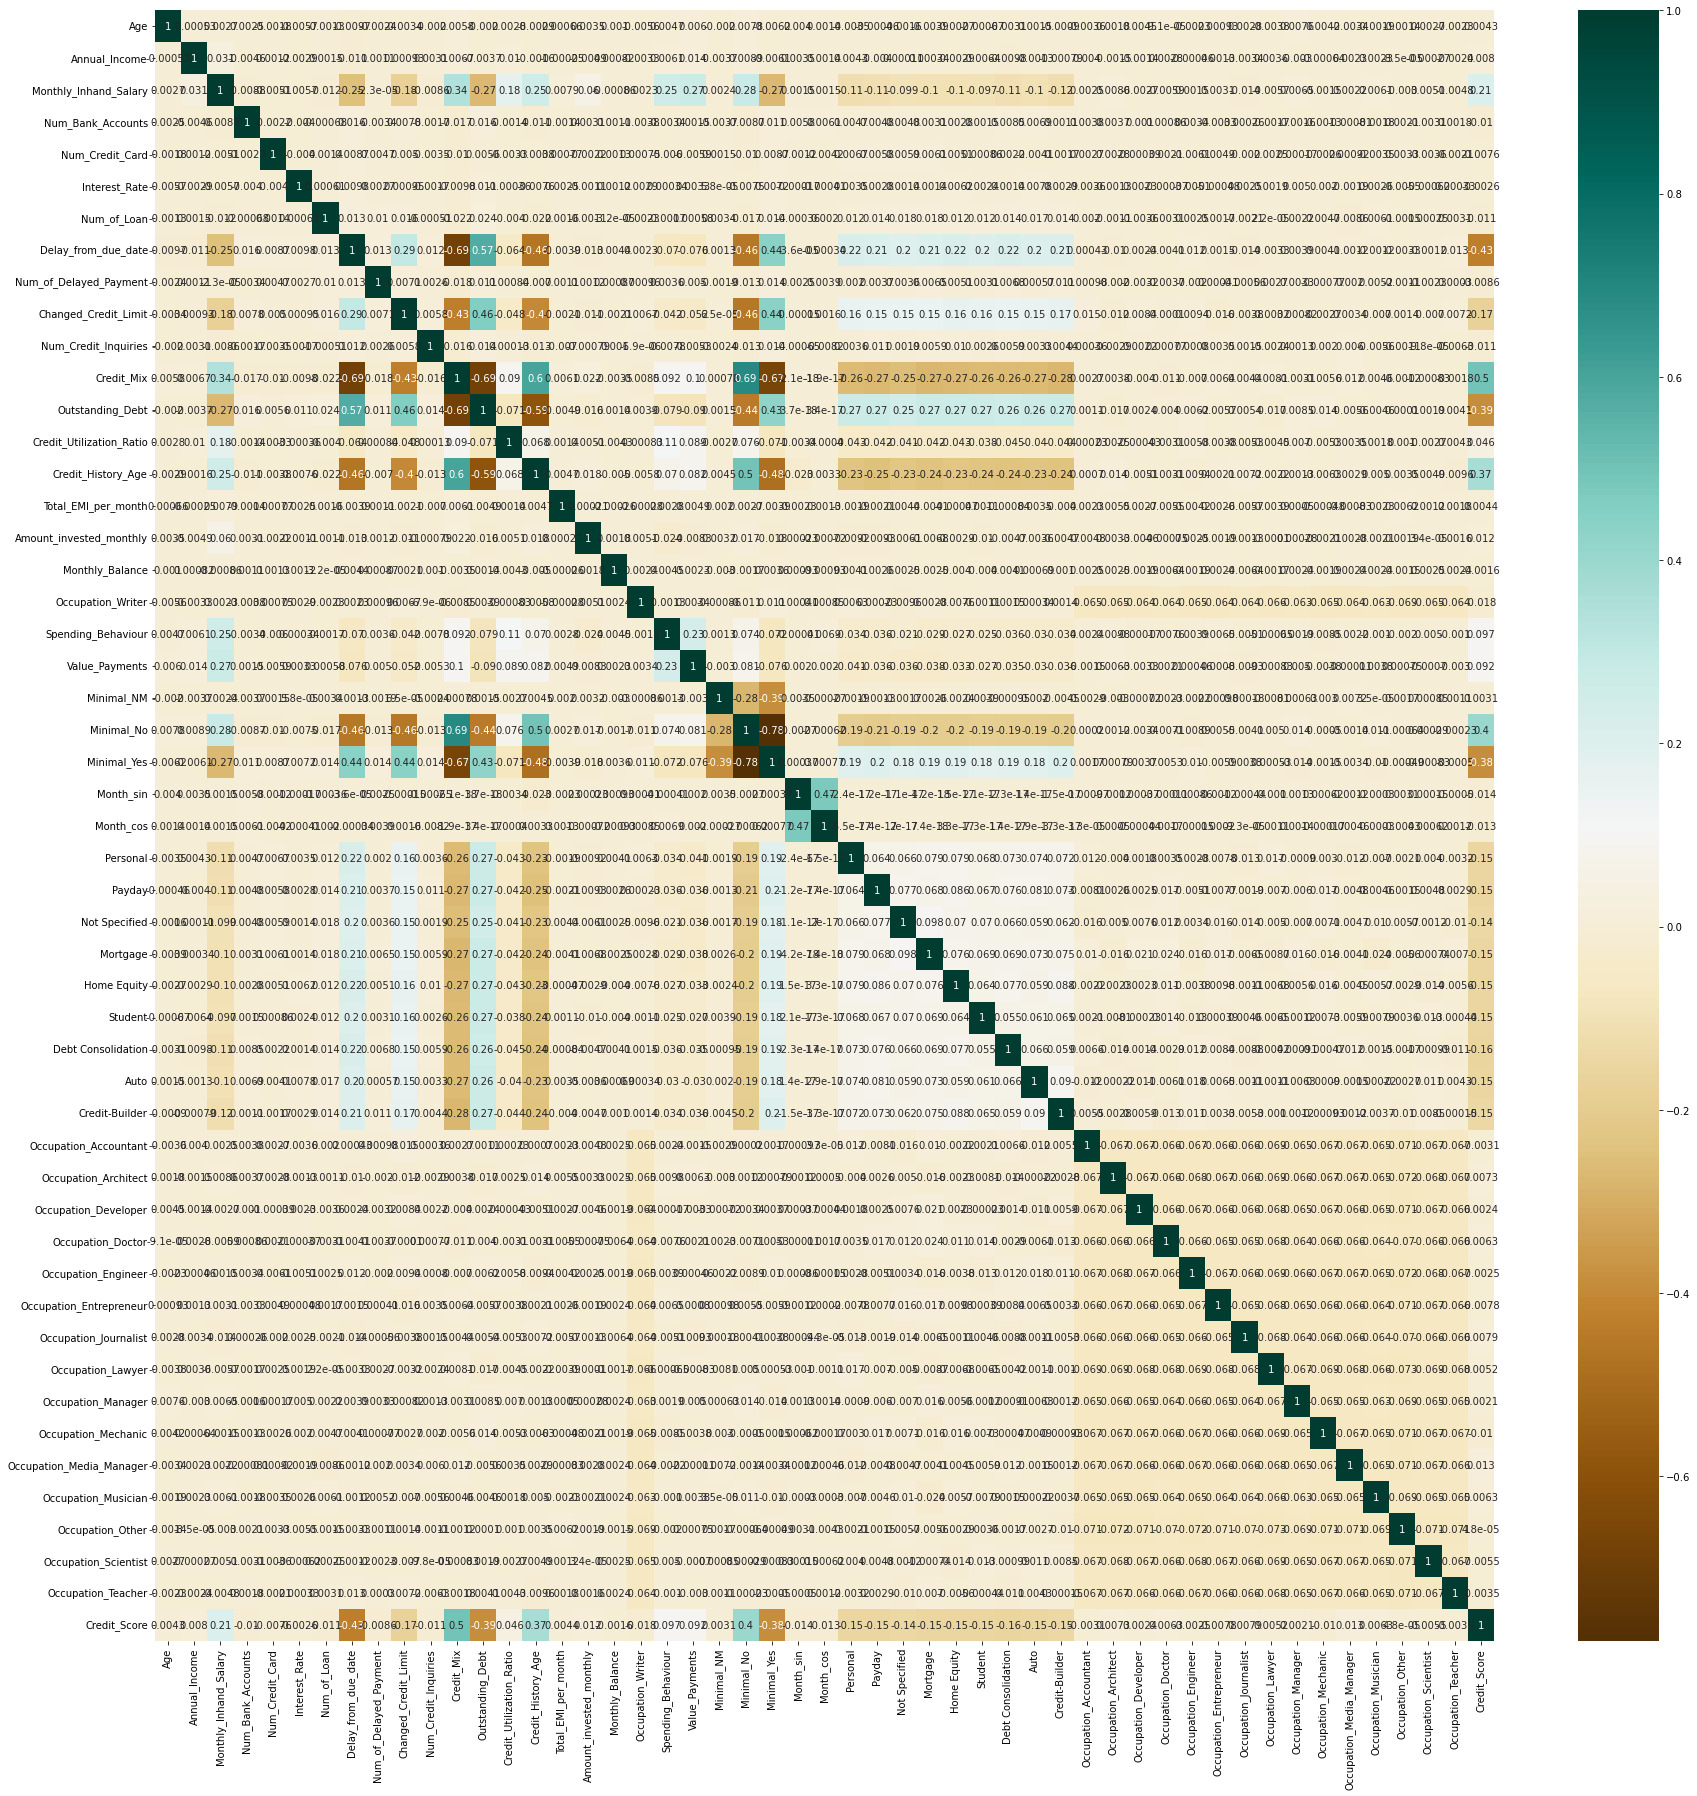

In [91]:
Train_na = fill_missing_values(Train_swaped)
corr_matrix = Train_na.corr("pearson")
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix,cmap="BrBG",annot=True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Credit_Mix'}>],
       [<AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>],
       [<AxesSubplot:title={'center':'Amount_in

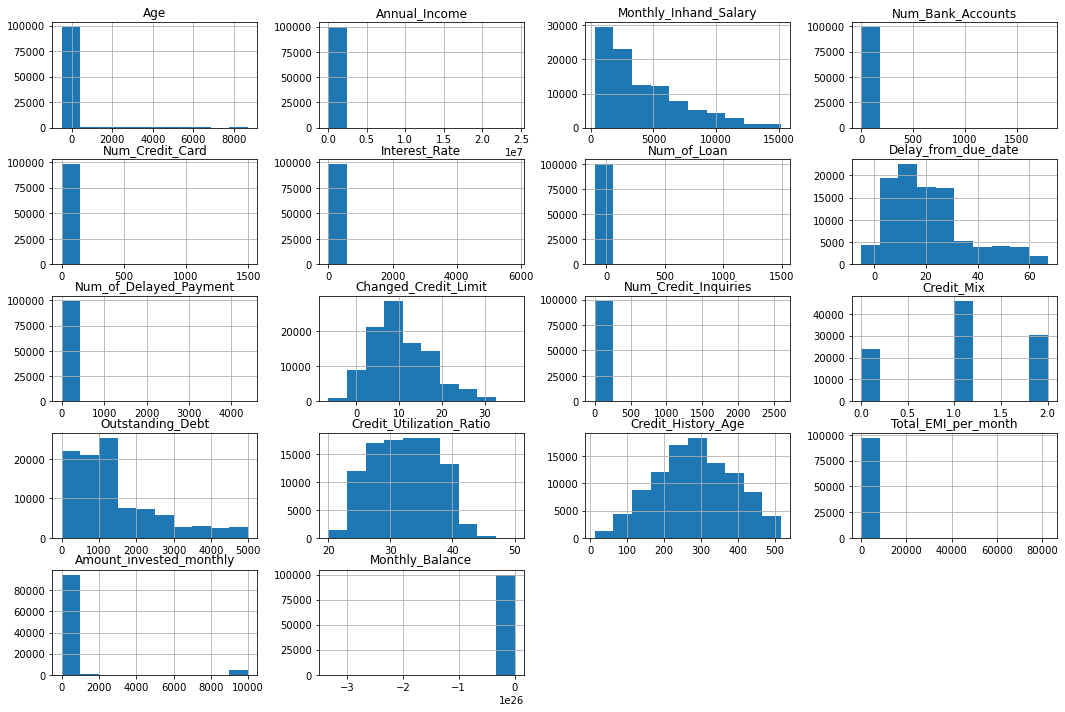

In [92]:
Train_na.loc[:,"Age":"Monthly_Balance"].hist(figsize = (18,12))


In [93]:
def outliers_agg(df):
  names = ["Age", "Annual_Income", "Num_Bank_Accounts", "Num_of_Delayed_Payment",
             "Monthly_Balance", "Num_Credit_Inquiries"]
  df_agg = df.copy()
  for i in names:
    upper_lim = Train_na[i].quantile(.98)
    lower_lim = Train_na[i].quantile(.02)
    df_agg[i] = np.where(df_agg[i] < lower_lim, lower_lim,
                   np.where(df_agg[i]>upper_lim, upper_lim,
                    df_agg[i]))
    
  names = ['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Total_EMI_per_month']  
  for i in names:
    upper_lim = Train_na[i].quantile(.96)
    lower_lim = Train_na[i].quantile(.04)
    df_agg[i] = np.where(df_agg[i] < lower_lim, lower_lim,
                   np.where(df_agg[i]>upper_lim, upper_lim,
                    df_agg[i]))
    
  
  upper_lim = Train_na['Amount_invested_monthly'].quantile(.955)
  lower_lim = Train_na['Amount_invested_monthly'].quantile(.045)
  df_agg['Amount_invested_monthly'] = np.where(df_agg['Amount_invested_monthly'] < lower_lim, lower_lim,
                   np.where(df_agg['Amount_invested_monthly']>upper_lim, upper_lim,
                    df_agg['Amount_invested_monthly']))

  return df_agg

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Credit_Mix'}>],
       [<AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>],
       [<AxesSubplot:title={'center':'Amount_in

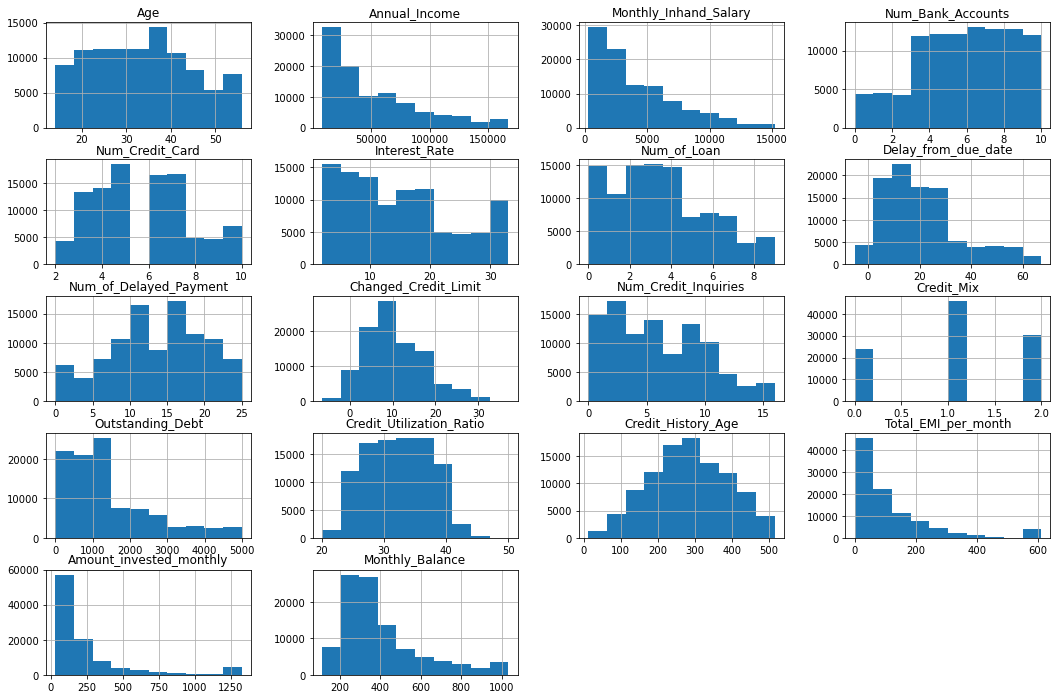

In [94]:
Train_outliers = outliers_agg(Train_na)
Train_outliers.loc[:,"Age":"Monthly_Balance"].hist(figsize = (18,12))

<AxesSubplot:>

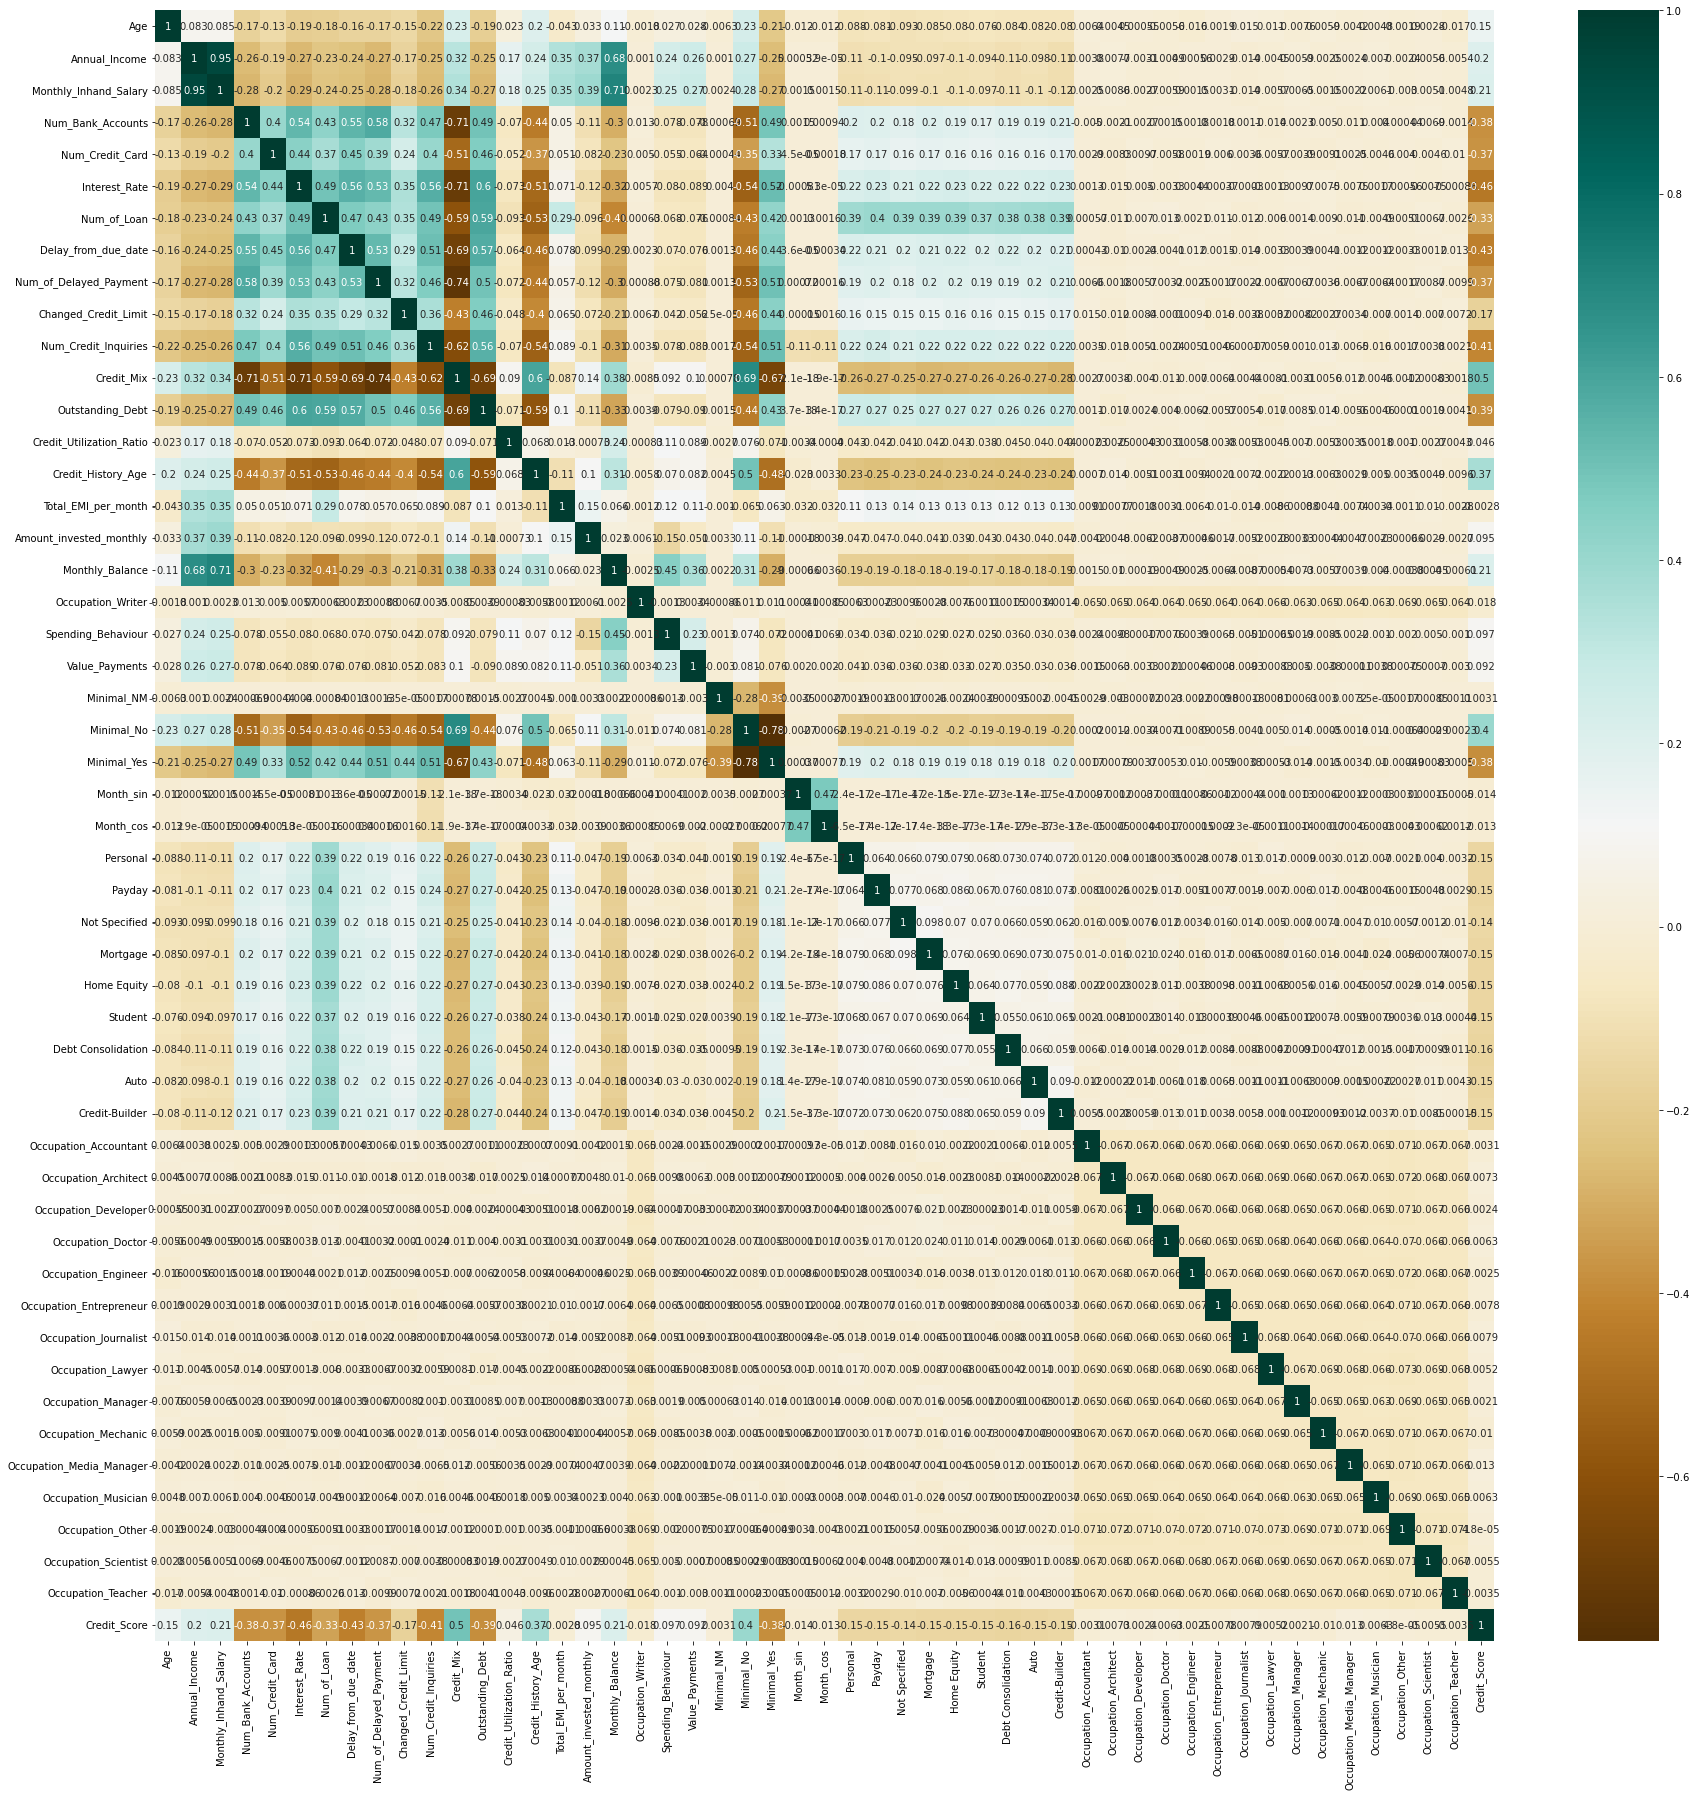

In [95]:
corr_matrix_p = Train_outliers.corr("pearson")
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix_p,cmap="BrBG",annot=True)


Normalizacja

In [96]:
def normal(df):
  df_norm = df.copy()
  norm_col = df_norm.columns.values[:-1]
  scaler_norm = MinMaxScaler()
  for i in df_norm[norm_col]:
    scaler_norm.fit(Train_outliers[[i]])
    df_norm[i] = scaler_norm.transform(df_norm[[i]])

  return df_norm

In [97]:
Train_norm = normal(Train_outliers)
Train_norm.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Other,Occupation_Scientist,Occupation_Teacher,Credit_Score
0,0.214286,0.069165,0.102087,0.3,0.25,0.032258,0.444444,0.111111,0.28,0.408652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,0.214286,0.069165,0.102087,0.3,0.25,0.032258,0.444444,0.055556,0.26,0.408652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,0.000000,0.069165,0.102087,0.3,0.25,0.032258,0.444444,0.111111,0.28,0.408652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,0.214286,0.069165,0.102087,0.3,0.25,0.032258,0.444444,0.138889,0.16,0.293603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
4,0.214286,0.069165,0.102087,0.3,0.25,0.032258,0.444444,0.152778,0.26,0.408652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [98]:
def X_y_transform(df):
  y = pd.Series(df['Credit_Score'])
  X = df.drop(['Credit_Score'],axis=1)
  return X,y

In [99]:
X_train,y_train = X_y_transform(Train_norm)

In [100]:
def auc_pred(X,y):
  target = label_binarize(y, classes=[0, 1, 2])
  model = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X, target)
  prob_test_vec = model.predict_proba(X)[::, 1]

 
  n_classes = 3
  fpr = [0] * 3
  tpr = [0] * 3
  thresholds = [0] * 3
  auc_score = [0] * 3
 
  for i in range(n_classes):
      fpr[i], tpr[i], thresholds[i] = roc_curve(target[:, i], prob_test_vec)
      auc_score[i] = auc(fpr[i], tpr[i])

  return 2 * (sum(auc_score) / n_classes) - 1

In [101]:
names = X_train.columns.values
#nameses = X_train.columns.values[32:]

for i in names:
  print(i, auc_pred(pd.DataFrame(X_train[i]), y_train))

#print(nameses, auc_pred(pd.DataFrame(X_train[nameses]), y_train))

Age 0.016246967616582397
Annual_Income 0.021392409500283982
Monthly_Inhand_Salary 0.02149988880622633
Num_Bank_Accounts -0.0478385251615685
Num_Credit_Card 0.0357873790867107
Interest_Rate 0.04810782971334926
Num_of_Loan 0.02663785476386482
Delay_from_due_date 0.04783014965306509
Num_of_Delayed_Payment -0.05175567193295272
Changed_Credit_Limit -0.04392967828412475
Num_Credit_Inquiries 0.03424209032147618
Credit_Mix -0.06979119379606102
Outstanding_Debt 0.024624642326428914
Credit_Utilization_Ratio 0.004431238329319465
Credit_History_Age 0.03608922864008912
Total_EMI_per_month 0.00036204140854501077
Amount_invested_monthly -0.013350351739881194
Monthly_Balance 0.02059687364899765
Occupation_Writer -0.0017842604825086816
Spending_Behaviour 0.006914741645426048
Value_Payments 0.008098654442433295
Minimal_NM -0.0010792587444670154
Minimal_No -0.052878281855414655
Minimal_Yes -0.05395754059988178
Month_sin -0.005718069436803419
Month_cos -0.0072037515409751895
Personal 0.011312413227090978


In [ ]:
#def drop_corr(df):
 # df_drop = df.copy()
  #df_drop = df_drop.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos'], axis = 1)
  #return df_drop

In [ ]:
#X_train = drop_corr(X_train)

In [102]:
def data_preprocessing(X,y):
  df = create_df(X,y)
  df = drop_columns(df)
  df = clean_records(df)
  df = Credit_History_Age_trasform(df)
  df = colums_encoding(df)
  df = encoding_to_num(df)
  df = encoding_columns_2(df)
  df = occupation_agg(df)
  df = swap_columns(df, 'Credit_Score', 'Occupation_Writer')
  df = fill_missing_values(df)
  df = outliers_agg(df)
  df = normal(df)
  #df = drop_corr(df)

  return X_y_transform(df)

In [104]:
X_test, y_test = data_preprocessing(X_test, y_test)

C:\Users\karim\AppData\Local\Temp/ipykernel_28488/1508392769.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


### Walidacja

In [120]:
validate = pd.read_csv("validate.csv")
y_validate = validate['Credit_Score']
x_validate = validate.drop(['Credit_Score', 'Unnamed: 0'],axis=1)

In [122]:
x_validate_pre, y_validate_pre = data_preprocessing(x_validate,y_validate)

C:\Users\karim\AppData\Local\Temp/ipykernel_28488/1508392769.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


In [145]:
y_validate_pre.value_counts()

1.0    10704
0.0     5780
2.0     3516
Name: Credit_Score, dtype: int64

In [146]:
y_train.value_counts()

1.0    53174
0.0    28998
2.0    17828
Name: Credit_Score, dtype: int64

Modele

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.9840625


In [123]:
rf_y_pred = rf.predict(x_validate_pre)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.98555


In [114]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf_y_pred = sgd_clf.predict(X_test)
sgd_clf_accuracy = accuracy_score(y_test,sgd_clf_y_pred)
print("accuracy=",sgd_clf_accuracy)  

accuracy= 0.6511875


In [124]:
sgd_clf_y_pred = sgd_clf.predict(x_validate_pre)
sgd_clf_accuracy = accuracy_score(y_validate_pre,sgd_clf_y_pred)
print("accuracy=",sgd_clf_accuracy) 

accuracy= 0.65235


In [125]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn_y_pred = kn.predict(X_test)
kn_accuracy = accuracy_score(y_test,kn_y_pred)
print("accuracy=",kn_accuracy)  

accuracy= 0.7881875


In [126]:
kn_y_pred = kn.predict(x_validate_pre)
kn_accuracy = accuracy_score(y_validate_pre,kn_y_pred)
print("accuracy=",kn_accuracy) 

accuracy= 0.78785


In [127]:
from sklearn.tree import DecisionTreeClassifier
dt_tree = DecisionTreeClassifier(random_state=1)
dt_tree.fit(X_train, y_train)
dt_tree_y_pred = dt_tree.predict(X_test)
dt_tree_accuracy = accuracy_score(y_test,dt_tree_y_pred)
print("accuracy=",dt_tree_accuracy)  

accuracy= 0.964875


In [128]:
dt_tree_y_pred = dt_tree.predict(x_validate_pre)
dt_tree_accuracy = accuracy_score(y_validate_pre,dt_tree_y_pred)
print("accuracy=",dt_tree_accuracy)  

accuracy= 0.9698


In [129]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Num_Bank_Accounts'], axis = 1)
X_test_drop = X_test_copy.drop(['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Num_Bank_Accounts'], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.9831875


In [131]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy.drop(['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Num_Bank_Accounts'], axis = 1)
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.98465


In [132]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes'], axis = 1)
X_test_drop = X_test_copy.drop(['Minimal_NM' ,'Minimal_No', 'Minimal_Yes'], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.9834375


In [133]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes'], axis = 1)
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.98545


In [134]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Month_sin', 'Month_cos'], axis = 1)
X_test_drop = X_test_copy.drop(['Month_sin', 'Month_cos'], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.9829375


In [135]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy.drop(['Month_sin', 'Month_cos'], axis = 1)
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.9847


In [136]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy[X_train_copy.columns.drop(list(X_train_copy.filter(regex='Occupation')))]
X_test_drop = X_test_copy[X_test_copy.columns.drop(list(X_test_copy.filter(regex='Occupation')))]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.98375


In [137]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy[X_val_copy.columns.drop(list(X_test_copy.filter(regex='Occupation')))]
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.9855


In [138]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos'], axis = 1)
X_test_drop = X_test_copy.drop(['Minimal_NM' ,'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos',], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.9810625


In [139]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy.drop(['Minimal_NM' ,'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos',], axis = 1)
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.98315


<span style='color: red'>We wszystkich modelach jest podobna predykcyjność dla danych walidacyjnych jak i testowych. Najlepiej poradziły sobie drzewa losowe, wybieranie poszczególnych kolumn jest w zasadzie bez znaczenia dla predykcyjności. Możnaby również dodać inne miary predykcyjności oprócz accuracy_score. </span>

<span style='color: red'>Do pisania kodu powinna być użyta większa ilość funkcji, szczególnie jeśli chodzi o zastępowanie danych - wymagane było wykonanie wszystkich bloków kodu. To samo tyczy się modeli.</span>